<a href="https://colab.research.google.com/github/KaustubhKhulbe/PneumaticCalcs/blob/main/Counterbalancing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import statments

In [357]:
import numpy as np
import math
import matplotlib.pyplot as plt

###Inputs
***`pivot`*** - vector of pivot assuming the pivot is grounded at (0, 0)

***`cog`*** - center of gravity of pivot with same assumption as above

***`mass`*** - mass of pivot in kg

---

***`fixed_mount`*** - the point the spring is rigidly attached to

***`pivot_mount_dist`*** - the distance from pivot to spring mount


In [358]:
#Pivot inputs
pivot = np.array([5., 5.]) #Vector from (0,0) to (5,5)
cog = np.array([2., 2.]) 
mass = 2 #in kg

#Spring inputs
fixed_mount = np.array([0., 2.]) #This is a point
pivot_mount_dist = 5.

###Intermediate calculation to get moving_mount as a vector

In [359]:
unit_vec = pivot / np.linalg.norm(pivot)
moving_mount = unit_vec * pivot_mount_dist

###Plotting to visualize the pivot and spring setup

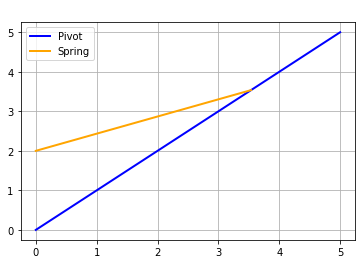

In [360]:
x = np.array([0, 5])
y = np.array([0, 5])
plt.plot(x, y, linewidth=2, c="blue", label="Pivot")

x2 = np.array([fixed_mount[0], moving_mount[0]])
y2 = np.array([fixed_mount[1], moving_mount[1]])
plt.plot(x2, y2, linewidth=2, c="orange", label="Spring")
plt.title("Visualization", c="white")

plt.grid()
plt.legend()

#Orange is spring, Blue is pivot

In [361]:
weight = [0, -mass * 9.81]
curr_torque = np.cross((weight), (cog))

In [362]:
#Helper function to find angle between two vectors

def angle(v1, v2):
  return math.acos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

###Spring constant
$F = kx$

$T = F x r$

In [363]:
#CALCULATE SPRING CONSTANT FOR LATER

distance_vec = moving_mount - fixed_mount #Vector between two spring mounts
theta = (angle(pivot, distance_vec))

F_s = curr_torque / ((np.sin(theta) * np.linalg.norm(moving_mount)))

spring_const = F_s / np.linalg.norm(distance_vec)
print(spring_const)


5.549374018752019


Sanity Check

In [364]:
#check

F_s = spring_const * distance_vec

first_half = np.cross(F_s, moving_mount) 
second_half = (curr_torque)
print("Check is: " + (str) (np.isclose(first_half, second_half)))

Check is: True


###Helper functions for loops

In [365]:
#More helpers
def getPivotMountVect(piv_new): #Returns the mounting vector at a new pivot arm
  unit = piv_new / np.linalg.norm(piv_new)
  #print(unit * pivot_mount_dist)
  return unit * pivot_mount_dist

def getTorqueSpring(piv_new): #Returns torque of spring at a new pivot arm
  pivMount = getPivotMountVect(piv_new)
  dist = (fixed_mount - pivMount)

  F_s_temp = spring_const * dist
  return np.cross(F_s_temp, pivMount)

def getCurrentTorque(piv): #Returns torque of gravity at a new pivot arm
  cog_t = (piv/np.linalg.norm(piv)) * np.linalg.norm(cog)
  weight = [0, -mass * 9.81]
  curr_torque = np.cross((cog_t), (weight))
  return curr_torque

###Looping to get each value from 0 to 180

In [366]:
x = np.linspace(0, 180, 180)
y1 = x.copy()
y2 = x.copy()

piv_len = np.linalg.norm(pivot)

for i in range(len(x)):
  piv_new = np.array([piv_len * np.cos(np.radians(x[i])), piv_len * np.sin(np.radians(x[i]))])
  torque_spring = getTorqueSpring(piv_new)
  y1[i] = torque_spring
  y2[i] = getCurrentTorque(piv_new)

#Graphing values!


###Pretty sure it's negative below 90 is because the spring is backwards

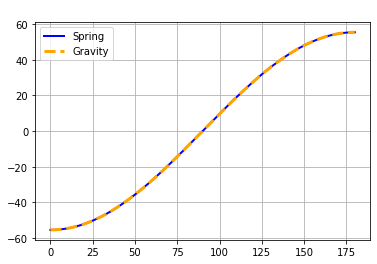

In [370]:
plt.title("Counterbalanced graph", c="white")
plt.plot(x, y1, c="blue", linewidth=2, label="Spring")
plt.plot(x, y2, c="orange", linewidth=3, label="Gravity", linestyle="dashed")
plt.grid()
plt.legend()